#  ISP Customer Churn Analysis
### Data Cleaning • Exploratory Data Analysis • Insights

This notebook analyzes customer churn for an Internet Service Provider (ISP).  
We explore customer behavior, service usage, and billing patterns to understand what drives churn.

**Dataset:** IBM Telco Customer Churn  


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


In [65]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

We start by reviewing the structure of the dataset to understand:
- Number of rows and columns  
- Data types  
- Missing values  
- Basic statistics  


In [66]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check missing values created by coercion
df["TotalCharges"].isnull().sum()


np.int64(11)

Removing Empty space rows

In [68]:
df = df.dropna(subset=["TotalCharges"])
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Yes", 0: "No"})


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Data Cleaning Summary

The following cleaning steps were completed:

- Converted `TotalCharges` from object → float  
- Removed 11 rows with invalid or missing `TotalCharges`  
- Converted `SeniorCitizen` from (0,1) → ("No","Yes")  
- Confirmed all other variables have no missing values  

The cleaned dataset contains **7032 rows** and **21 columns**.


#  Churn Count Plot and churn percent

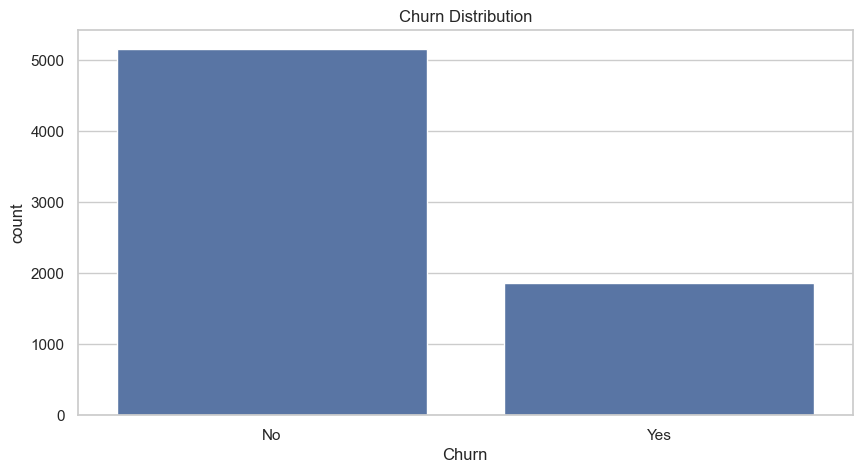

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

(df["Churn"].value_counts(normalize=True) * 100).round(2) # show chuern percentage



#  Tenure Distribution vs Churn

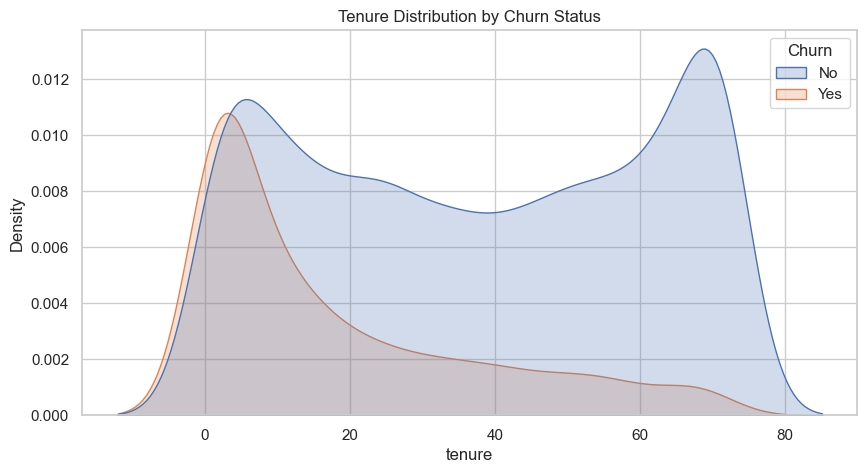

In [72]:
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True)
plt.title("Tenure Distribution by Churn Status")
plt.show()


# Contract Type Vs Churn

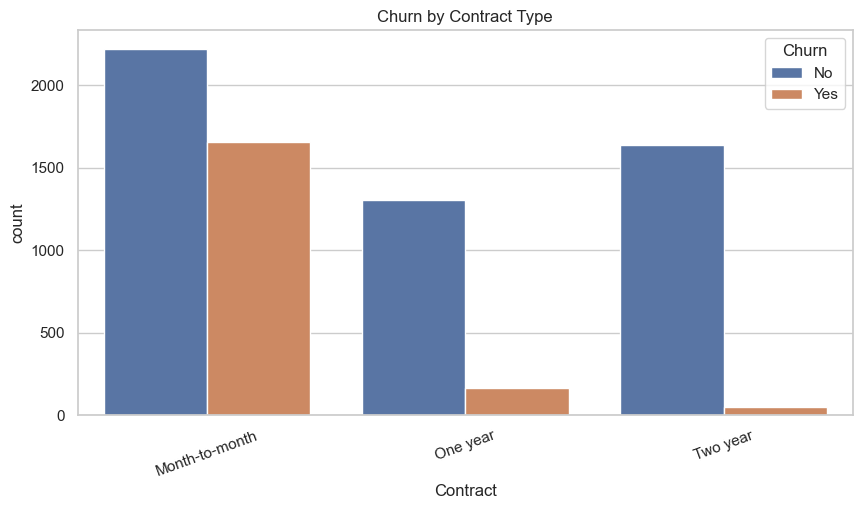

In [73]:
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()


# Monthly Charges vs Churn

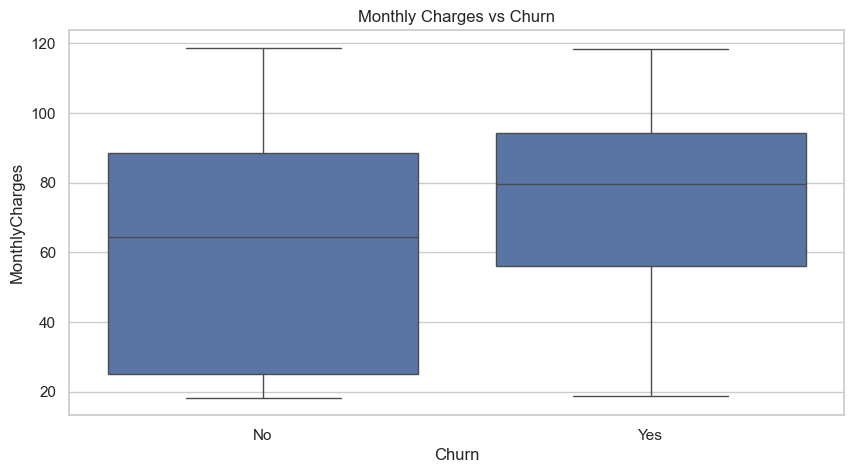

In [74]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


# Internet Service vs Churn

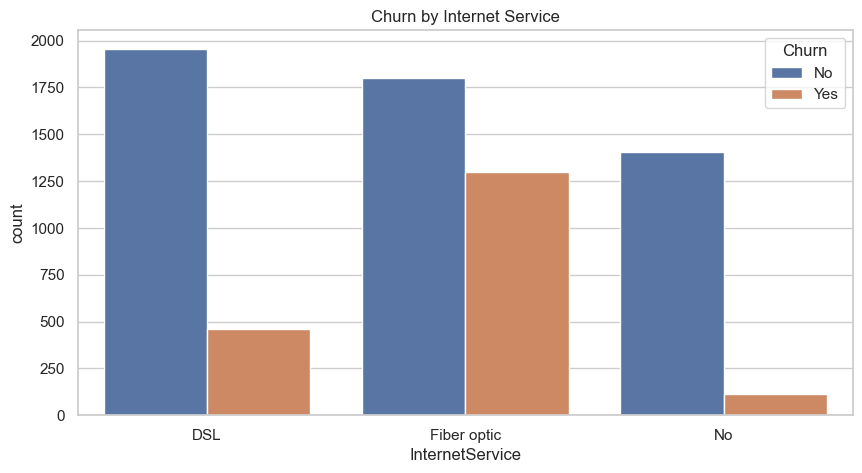

In [75]:
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Churn by Internet Service")
plt.show()


# Correlation Heatmap

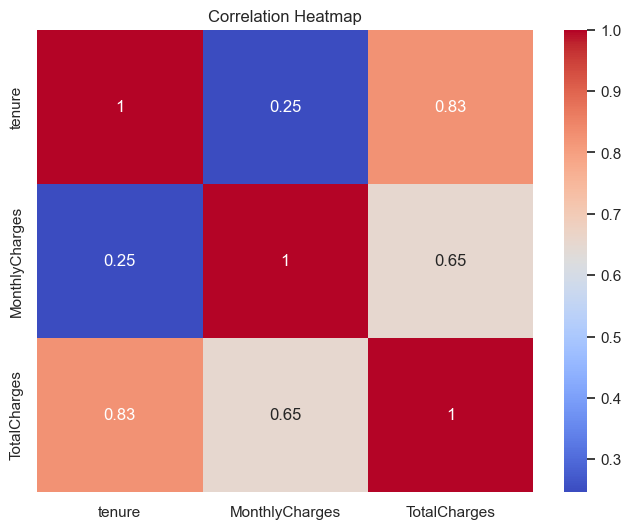

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [77]:
# === 1. Overall Churn Rate ===
total_customers = len(df)
churn_counts = df["Churn"].value_counts()
churn_rate = (churn_counts["Yes"] / total_customers) * 100

# === 2. Tenure Stats for Churned vs Not Churned ===
tenure_stats = df.groupby("Churn")["tenure"].describe()

# === 3. Contract Type Churn Counts ===
contract_churn_counts = df.groupby(["Contract", "Churn"]).size()
contract_churn_rates = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack() * 100

# === 4. Monthly Charges Median (Churn vs Not Churn) ===
monthly_charge_medians = df.groupby("Churn")["MonthlyCharges"].median()
monthly_charge_describe = df.groupby("Churn")["MonthlyCharges"].describe()

# === 5. Internet Service Churn Counts ===
internet_churn_counts = df.groupby(["InternetService", "Churn"]).size()
internet_churn_rates = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack() * 100

# === 6. Correlations Among Numeric Features ===
correlations = df.corr(numeric_only=True)

# === Display all results ===
{
    "Total Customers": total_customers,
    "Churn Counts": churn_counts.to_dict(),
    "Churn Rate (%)": round(churn_rate, 2),
    
    "Tenure Stats": tenure_stats,
    
    "Contract Churn Counts": contract_churn_counts,
    "Contract Churn Rates (%)": contract_churn_rates.round(2),
    
    "Monthly Charge Medians": monthly_charge_medians.round(2),
    "Monthly Charge Distribution": monthly_charge_describe,
    
    "Internet Service Churn Counts": internet_churn_counts,
    "Internet Service Churn Rates (%)": internet_churn_rates.round(2),
    
    "Correlation Matrix": correlations.round(2)
}


{'Total Customers': 7032,
 'Churn Counts': {'No': 5163, 'Yes': 1869},
 'Churn Rate (%)': np.float64(26.58),
 'Tenure Stats':         count       mean        std  min   25%   50%   75%   max
 Churn                                                           
 No     5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
 Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0,
 'Contract Churn Counts': Contract        Churn
 Month-to-month  No       2220
                 Yes      1655
 One year        No       1306
                 Yes       166
 Two year        No       1637
                 Yes        48
 dtype: int64,
 'Contract Churn Rates (%)': Churn              No    Yes
 Contract                    
 Month-to-month  57.29  42.71
 One year        88.72  11.28
 Two year        97.15   2.85,
 'Monthly Charge Medians': Churn
 No     64.45
 Yes    79.65
 Name: MonthlyCharges, dtype: float64,
 'Monthly Charge Distribution':         count       mean        std    min    25%  

##  Key Findings from ISP Churn Analysis

### 1. Overall Churn Metrics
- **Total Customer Base**: 7,032 customers
- **Customers Retained**: 5,163 (73.42%)
- **Customers Churned**: 1,869 (26.58%)
- **Key Insight**: More than 1 in 4 customers have left the service, representing a substantial revenue loss and indicating systemic retention issues.

---

### 2. Tenure Analysis - The First Year Crisis

**Churned Customers:**
- Average tenure: **17.98 months** (less than 1.5 years)
- Median tenure: **10 months** (50% churn within first year)
- Interquartile range: 2-29 months
- Standard deviation: 19.53 months

**Retained Customers:**
- Average tenure: **37.65 months** (over 3 years)
- Median tenure: **38 months**
- Interquartile range: 15-61 months
- Standard deviation: 24.08 months

**Critical Finding**: Churned customers have less than **half the average tenure** of retained customers (18 vs 38 months). The median tenure of 10 months for churned customers confirms that the first year is the critical vulnerability period.

---

### 3. Contract Type - The Commitment Factor

**Month-to-Month Contracts (Highest Risk):**
- Total: 3,875 customers (55% of customer base)
- Churned: 1,655 (42.71% churn rate)
- Retained: 2,220 (57.29%)
- **Impact**: This segment accounts for **88.5% of all churn** despite being only 55% of customers

**One-Year Contracts (Moderate Risk):**
- Total: 1,472 customers (21% of customer base)
- Churned: 166 (11.28% churn rate)
- Retained: 1,306 (88.72%)
- **Improvement**: Churn rate drops by **73.6%** compared to month-to-month

**Two-Year Contracts (Lowest Risk):**
- Total: 1,685 customers (24% of customer base)
- Churned: 48 (2.85% churn rate)
- Retained: 1,637 (97.15%)
- **Achievement**: Only **2.6% of all churn** comes from this segment
- **ROI**: Churn rate is **15x lower** than month-to-month contracts

---

### 4. Pricing Dynamics

**Monthly Charges by Churn Status:**
- Churned customers: **$79.65 median** monthly charge
- Retained customers: **$64.45 median** monthly charge
- **Price difference**: $15.20/month (**23.6% higher** for churned customers)

**Interpretation**: Customers paying premium prices are significantly more likely to churn, suggesting either:
- Value perception issues (not getting worth for money)
- Competitive alternatives at better prices
- Service quality not matching the premium cost

---

### 5. Internet Service Performance

**DSL Service (Best Retention):**
- Churn rate: **19.18%**
- Retention rate: **80.82%**
- Performance: **28% better retention** than overall average

**Fiber Optic Service (Worst Retention):**
- Churn rate: **41.89%**
- Retention rate: **58.11%**
- **Critical Issue**: Churn rate is **57.6% higher** than overall average
- **Red Flag**: Premium service has worst performance

**No Internet Service (Excellent Retention):**
- Churn rate: **7.43%**
- Retention rate: **92.57%**
- Performance: Phone-only customers are most loyal

---

### 6. Financial Correlation Insights

**Strong Positive Correlations:**
- **Tenure ↔ TotalCharges (0.83)**: As customers stay longer, cumulative charges increase predictably
- **MonthlyCharges ↔ TotalCharges (0.65)**: Higher monthly rates lead to higher total revenue, but not linearly

**Weak Correlation:**
- **Tenure ↔ MonthlyCharges (0.25)**: Monthly pricing shows little relationship with how long customers stay
- **Implication**: Long-term customers don't necessarily pay more per month, suggesting no loyalty pricing premium or gradual price increases

---

##  Quantified Business Impact

### Revenue at Risk
Assuming average monthly charge of $79.65 for churned customers:
- **Annual revenue lost**: 1,869 customers × $79.65 × 12 = **$1.79 million**
- **Lifetime value impact**: With average tenure of only 18 months before churn, potential long-term revenue loss is substantial

### Contract Migration Opportunity
If 50% of month-to-month customers (1,938) were converted to one-year contracts:
- **Potential churn reduction**: 1,938 × (42.71% - 11.28%) = **609 customers saved**
- **Additional annual revenue**: 609 × $64.45 × 12 = **$471,000**

### Fiber Optic Service Issue
With 41.89% churn in fiber optic (vs 19.18% for DSL):
- If fiber optic churn matched DSL levels, approximately **700+ customers** could be retained
- **Revenue recovery potential**: $667,000+ annually